# Gesture UI Project 1
By Levente Kalman

Student no: G00392201

In [2]:
# Imports
import os
import glob 
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [3]:
# Set random seed 
RANDOM_SEED = 392201

In [4]:
# Define dataset path
DATASET_PATH = sorted(glob.glob('fashion/*/*.png'))

# Define the actual categories present in the dataset
categories = ['ankleboot', 'bag', 'coat', 'dress', 'pullover', 'sandal', 'shirt', 'sneaker', 'trouser', 'tshirt-top']

# Create a mapping from class names to integer labels
class_mapping = {category: idx for idx, category in enumerate(categories)}

# Create a file list
X = np.array([np.array(Image.open(f).convert('L').resize((20, 20))).flatten() for f in DATASET_PATH]) / 255.0 # normalize pixels
# Extract class labels from filenames
y = np.array([class_mapping[os.path.basename(os.path.dirname(f))] for f in DATASET_PATH])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 10 labels:", y[:10])  # Check labels

a = [s.split() for s in " ".join(DATASET_PATH).split("\\") if s]

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=RANDOM_SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)

# Print shapes of datasets
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_valid.shape, y_valid.shape)
print("Test set size:", X_test.shape, y_test.shape)

Shape of X: (70000, 400)
Shape of y: (70000,)
First 10 labels: [0 0 0 0 0 0 0 0 0 0]
Training set size: (42000, 400) (42000,)
Validation set size: (14000, 400) (14000,)
Test set size: (14000, 400) (14000,)


# Classifier Methods
Classification algorithms used:
- SVM
- Logistical Regression
- K Nearest Neighbor
- Random Forest

## SVM 

In [5]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=RANDOM_SEED)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred = svm_classifier.predict(X_valid)
accuracy = svm_classifier.score(X_test, y_test)

In [10]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred, target_names=categories))
print(confusion_matrix(y_valid, y_pred))
print("SVM Test Accuracy:", accuracy)

              precision    recall  f1-score   support

   ankleboot       0.96      0.96      0.96      1363
         bag       0.96      0.97      0.97      1414
        coat       0.80      0.84      0.82      1395
       dress       0.87      0.91      0.89      1441
    pullover       0.82      0.80      0.81      1424
      sandal       0.97      0.95      0.96      1406
       shirt       0.74      0.66      0.70      1403
     sneaker       0.93      0.95      0.94      1406
     trouser       0.99      0.96      0.98      1387
  tshirt-top       0.82      0.87      0.85      1361

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000

[[1303    1    0    0    0   12    1   46    0    0]
 [   0 1378    6    6    4    2    9    5    0    4]
 [   0    4 1171   39   90    0   88    0    2    1]
 [   0    6   40 1316    8    0   30    0    4   37]
 [   0    8  150   15 1136   

## Logistical Regression

In [7]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000)

# Train the classifier
logistic_regression_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_lr = logistic_regression_classifier.predict(X_valid)
accuracy_lr = logistic_regression_classifier.score(X_test, y_test)

In [8]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_lr, target_names=categories))
print(confusion_matrix(y_valid, y_pred_lr))
print("Logistic Regression Test Accuracy:", accuracy_lr)

              precision    recall  f1-score   support

   ankleboot       0.94      0.95      0.95      1363
         bag       0.95      0.95      0.95      1414
        coat       0.74      0.79      0.76      1395
       dress       0.85      0.88      0.86      1441
    pullover       0.76      0.74      0.75      1424
      sandal       0.94      0.93      0.94      1406
       shirt       0.66      0.59      0.62      1403
     sneaker       0.92      0.93      0.93      1406
     trouser       0.98      0.96      0.97      1387
  tshirt-top       0.80      0.84      0.82      1361

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000

[[1289    2    0    0    0   23    0   48    0    1]
 [   1 1344    6    8    9    8   21    7    0   10]
 [   0    7 1104   40  120    0  123    0    1    0]
 [   0    9   56 1264   14    0   30    0   18   50]
 [   0    9  184   16 1048   

## K Nearest Neighbor


In [12]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_knn = knn_classifier.predict(X_valid)
accuracy_knn = knn_classifier.score(X_test, y_test)

In [13]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_knn, target_names=categories))
print(confusion_matrix(y_valid, y_pred_knn))
print("KNN Test Accuracy:", accuracy_knn)

              precision    recall  f1-score   support

   ankleboot       0.88      0.97      0.92      1363
         bag       0.97      0.96      0.96      1414
        coat       0.75      0.81      0.78      1395
       dress       0.89      0.88      0.89      1441
    pullover       0.75      0.78      0.77      1424
      sandal       0.99      0.84      0.91      1406
       shirt       0.68      0.58      0.63      1403
     sneaker       0.89      0.95      0.92      1406
     trouser       0.99      0.97      0.98      1387
  tshirt-top       0.79      0.84      0.82      1361

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000

[[1317    0    0    0    1    1    0   44    0    0]
 [   4 1358    5    8   13    0   15    5    0    6]
 [   0    3 1132   28  128    0   99    0    1    4]
 [   0    3   66 1271    9    0   43    0   10   39]
 [   0    4  177   21 1106   

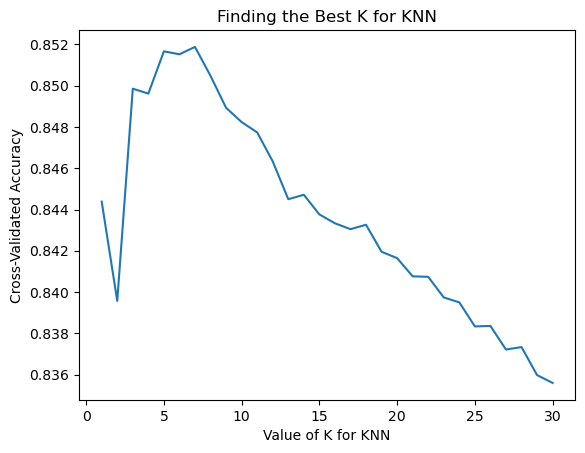

The best value of K is 7 with a cross-validated accuracy of 0.8519


In [16]:
# k-Fold Cross Validation to find best k for KNN
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Best K for KNN')
plt.show()

# Find the best K
best_k = k_range[np.argmax(k_scores)]
print(f'The best value of K is {best_k} with a cross-validated accuracy of {max(k_scores):.4f}')

In [18]:
# Re-train the KNN classifier with the best k
# Initialize the KNN classifier with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier
knn_best.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_knn_best = knn_best.predict(X_valid)
accuracy_knn_best = knn_best.score(X_test, y_test)

In [19]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_knn_best, target_names=categories))
print(confusion_matrix(y_valid, y_pred_knn_best))
print("KNN Test Accuracy with best k:", accuracy_knn_best)

              precision    recall  f1-score   support

   ankleboot       0.88      0.97      0.92      1363
         bag       0.96      0.96      0.96      1414
        coat       0.74      0.79      0.77      1395
       dress       0.90      0.88      0.89      1441
    pullover       0.74      0.77      0.75      1424
      sandal       0.99      0.83      0.91      1406
       shirt       0.67      0.58      0.62      1403
     sneaker       0.89      0.95      0.92      1406
     trouser       0.99      0.96      0.98      1387
  tshirt-top       0.78      0.86      0.82      1361

    accuracy                           0.85     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.85      0.85     14000

[[1317    0    0    0    1    1    0   44    0    0]
 [   4 1356    8    9   14    0   14    5    0    4]
 [   0    3 1108   28  143    0  108    0    1    4]
 [   0    4   68 1261   10    0   40    0   12   46]
 [   0    6  180   16 1097   

## Random Forest

In [14]:
# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=RANDOM_SEED)

# Train the classifier
random_forest_classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred_rf = random_forest_classifier.predict(X_valid)
accuracy_rf = random_forest_classifier.score(X_test, y_test)

In [15]:
# Print classification report and confusion matrix
print(classification_report(y_valid, y_pred_rf, target_names=categories))
print(confusion_matrix(y_valid, y_pred_rf))
print("Random Forest Test Accuracy:", accuracy_rf)

              precision    recall  f1-score   support

   ankleboot       0.94      0.95      0.94      1363
         bag       0.96      0.98      0.97      1414
        coat       0.76      0.84      0.80      1395
       dress       0.88      0.92      0.90      1441
    pullover       0.79      0.79      0.79      1424
      sandal       0.96      0.96      0.96      1406
       shirt       0.74      0.59      0.66      1403
     sneaker       0.94      0.93      0.93      1406
     trouser       0.99      0.96      0.98      1387
  tshirt-top       0.81      0.85      0.83      1361

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000

[[1295    2    0    0    1   19    0   46    0    0]
 [   1 1381    7    3    6    3    6    3    0    4]
 [   0    6 1178   46   99    0   61    0    2    3]
 [   0    1   44 1323    9    0   33    0    6   25]
 [   0   11  188   15 1125   